<a href="https://colab.research.google.com/github/pjhoon1004/ml_book_/blob/main/(cmass)iris_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.데이터 불러오기

In [ ]:
from google.colab import files
filename = list(files.upload().keys())[0]

Saving Iris.csv to Iris.csv


In [ ]:
import pandas as pd
iris_data = pd.read_csv(filename) 
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
iris_data = iris_data.iloc[:,1:] 

In [ ]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


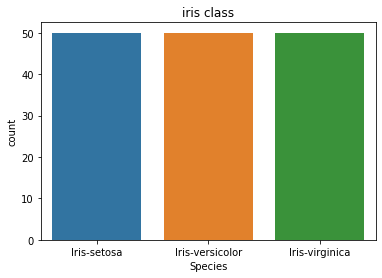

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Species',data=iris_data)
plt.title('iris class')
plt.show()

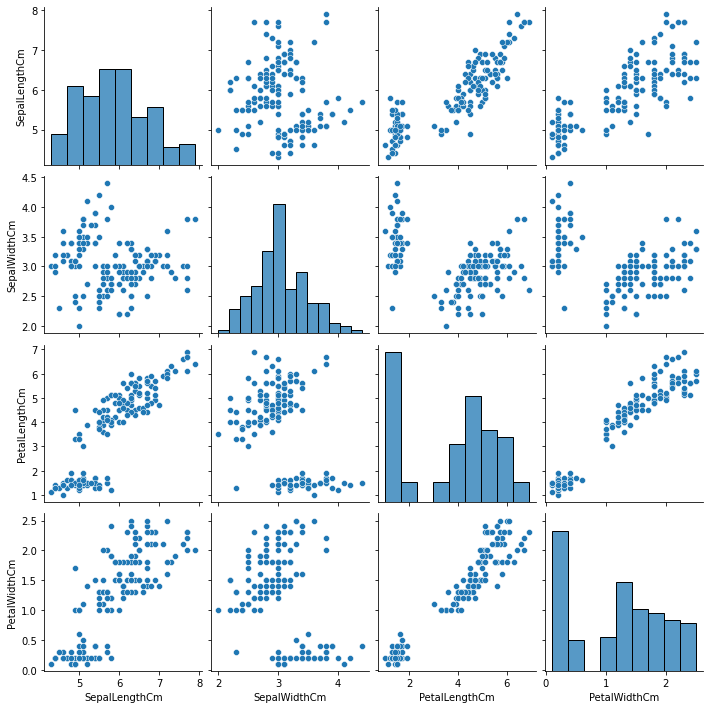

In [ ]:
sns.pairplot(data = iris_data)

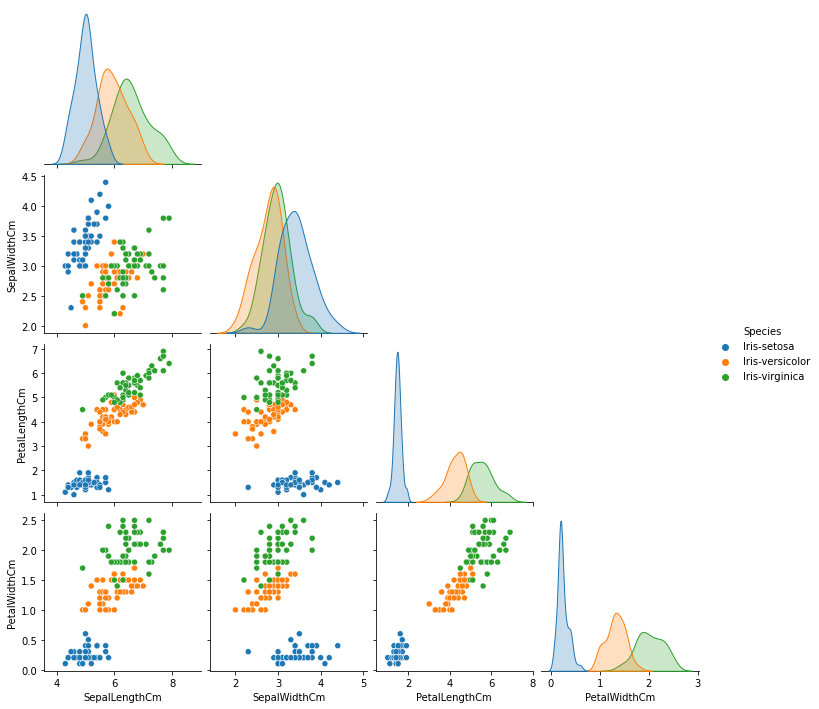

In [ ]:
sns.pairplot(iris_data, hue='Species', corner=True)

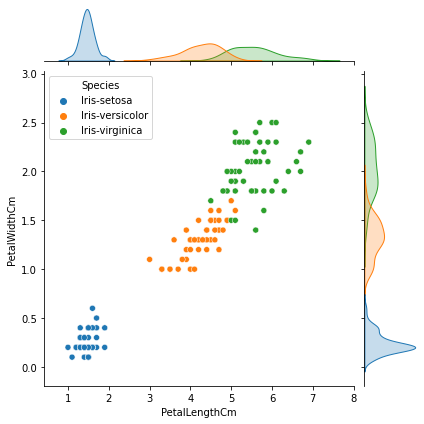

In [ ]:
sns.jointplot(x='PetalLengthCm', y='PetalWidthCm',data=iris_data, kind='scatter', hue='Species')

#numpy로 실습

In [ ]:
import numpy as np
np_iris_data = np.array(iris_data) # 판다스를 넘파이로 변환
np_iris_data[:5,:] # 0~4번행, 전체열

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [ ]:
# id와 label빼고 input variable 을 x_data에 저장
x_data = np_iris_data[:, 0:4] # 행 전체, 열은 0부터 3까지
y_data = np_iris_data[:, -1] # 행 전체, 열은 마지막 인덱스
print(x_data[:3])
print(y_data[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa']


##정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_data) #[0,1] x_data의 최소값을 0, 최대값을 1로 셋팅
scaled = scaler.transform(x_data)
round(pd.DataFrame(scaled).describe(),2)

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,0.43,0.44,0.47,0.46
std,0.23,0.18,0.30,0.32
min,0.00,0.00,0.00,0.00
25%,0.22,0.33,0.10,0.08
50%,0.42,0.42,0.57,0.50
75%,0.58,0.54,0.69,0.71
max,1.00,1.00,1.00,1.00


##표준화

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

std_scaler.fit(x_data) 
std_x_data = std_scaler.transform(x_data)
round(pd.DataFrame(std_x_data).describe(),2)

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.44,-1.57,-1.44
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.12,0.34,0.13
75%,0.67,0.57,0.76,0.79
max,2.49,3.11,1.79,1.71


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=11)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


#knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 3 # hyperparameter
knn = KNeighborsClassifier(n_neighbors=k) #모델생성
knn.fit(x_train, y_train) #모델학습

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predict = knn.predict(x_test)
predict[:5]

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn import metrics
print('knn accuracy:{:.3f}'.format(knn.score(x_test,y_test)))
#print('knn accuracy:{:.3f}'.format(metrics.accuracy_score(knn_pred, y_test)))

knn accuracy:0.956


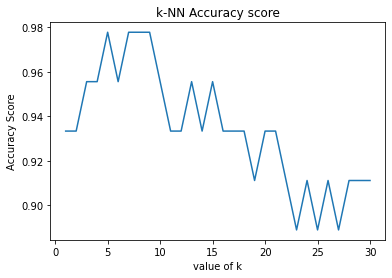

In [ ]:
# 시각화
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_range = range(1,31)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  scores.append(knn.score(x_test, y_test))

plt.plot(k_range, scores)
plt.xlabel("value of k")
plt.ylabel("Accuracy Score")
plt.title("k-NN Accuracy score")
plt.show()

In [ ]:
for value ,score in enumerate(scores):
    print('k={}일때 : accuracy:{}'.format(value+1,score))

k=1일때 : accuracy:0.9333333333333333
k=2일때 : accuracy:0.9333333333333333
k=3일때 : accuracy:0.9555555555555556
k=4일때 : accuracy:0.9555555555555556
k=5일때 : accuracy:0.9777777777777777
k=6일때 : accuracy:0.9555555555555556
k=7일때 : accuracy:0.9777777777777777
k=8일때 : accuracy:0.9777777777777777
k=9일때 : accuracy:0.9777777777777777
k=10일때 : accuracy:0.9555555555555556
k=11일때 : accuracy:0.9333333333333333
k=12일때 : accuracy:0.9333333333333333
k=13일때 : accuracy:0.9555555555555556
k=14일때 : accuracy:0.9333333333333333
k=15일때 : accuracy:0.9555555555555556
k=16일때 : accuracy:0.9333333333333333
k=17일때 : accuracy:0.9333333333333333
k=18일때 : accuracy:0.9333333333333333
k=19일때 : accuracy:0.9111111111111111
k=20일때 : accuracy:0.9333333333333333
k=21일때 : accuracy:0.9333333333333333
k=22일때 : accuracy:0.9111111111111111
k=23일때 : accuracy:0.8888888888888888
k=24일때 : accuracy:0.9111111111111111
k=25일때 : accuracy:0.8888888888888888
k=26일때 : accuracy:0.9111111111111111
k=27일때 : accuracy:0.8888888888888888
k=28일때 : a

##보충

In [ ]:
# 정규화
import numpy as np
height = [100,120,160,180]
weight = [20,30,50,70]
print(np.min(height), np.max(height)) 
print(np.min(weight), np.max(weight))

for x in height:
  print((x - min(height))/(np.max(height)-np.min(height)),end=' ')
print()

for x in weight:
  print((x - min(weight))/(np.max(weight)-np.min(weight)),end=' ')

In [ ]:
# 표준화
import numpy as np
height = [100,120,160,180]
weight = [20,30,50,70]
print(np.mean(height), round(np.std(height),1)) 
print(np.mean(weight), round(np.std(weight),1))

for x in height:
  print(round((x - np.mean(height))/np.std(height),2),end=' ')
print()

for x in weight:
  print(round((x - np.mean(weight))/np.std(weight),2),end=' ')